In [2]:
import cv2 as cv

In [3]:
print(cv.__version__)

4.12.0


In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
def showrgb(img):
    img_d = cv.cvtColor(img , cv.COLOR_BGR2RGB)
    plt.imshow(img_d)

In [7]:
img = cv.imread("blue_pizza.png")

In [8]:
img.shape

(209, 334, 3)

In [9]:
img_display = cv.cvtColor(img,cv.COLOR_RGB2BGR)

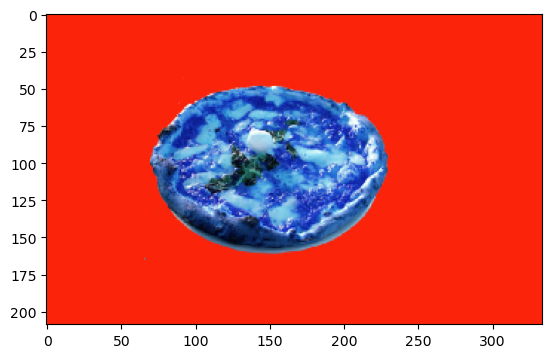

In [10]:
plt.imshow(img)

334 209


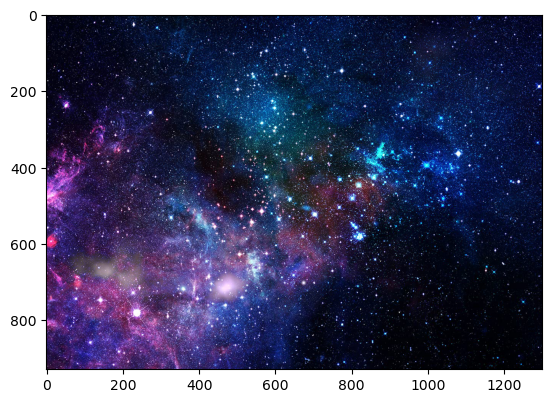

In [11]:
bg = cv.imread("space_bg.jpg")
bg_display=cv.cvtColor(bg,cv.COLOR_RGB2BGR)
plt.imshow(bg_display)
width = img.shape[1]
height = img.shape[0]
print (width, height)

In [12]:
# img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
# bg_hsv = cv.cvtColor(bg,cv.COLOR_BGR2HSV)
# plt.imshow(img_hsv)

In [13]:
#img_hsv[0:100,0]
#0:100 , first 0 to 100 lines

In [14]:

# for i in range(width):  #checking color for cell by cell . recheck the code
#     for j in range(height):
#         if img_hsv[j,i,0] != 117:
#             bg_hsv[j,i] = img_hsv[j,i]
       

In [15]:

#bg = cv.cvtColor(bg_hsv,cv.COLOR_HSV2BGR)
#img = cv.cvtColor(bg_hsv,cv.COLOR_HSV2BGR)

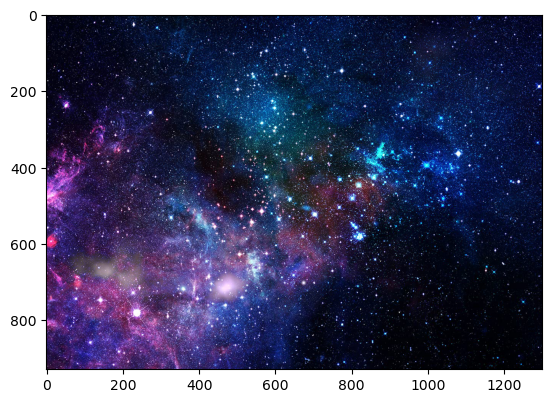

In [16]:
showrgb(bg) #done processing / output

In [17]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
mask = cv.inRange(img_gray , 50 , 55)


In [75]:
kernel = np.ones((3,3),np.uint8)
mask_clean = mask.copy()
# mask_clean = cv.dilate(mask,kernel,iterations = 1)
# mask_clean = cv.erode(mask,kernel,iterations = 1)
mask_clean = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)



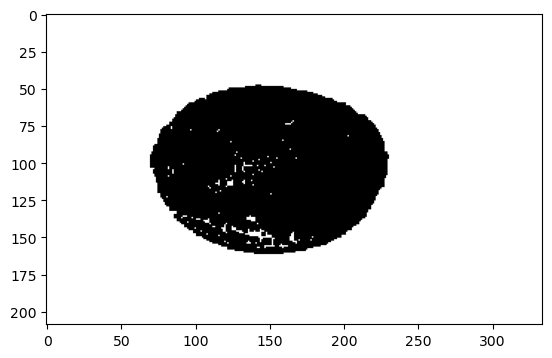

In [76]:
plt.imshow(mask_clean, cmap = 'gray' )

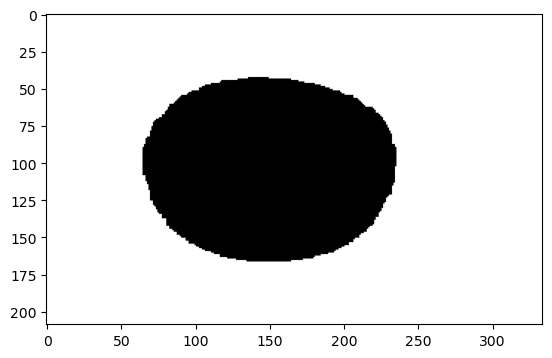

In [90]:
mask_clean = cv.morphologyEx(mask_clean, cv.MORPH_OPEN, kernel)
mask_clean = cv.erode(mask_clean,kernel,iterations = 2)


plt.imshow(mask_clean, cmap = 'gray' )

In [88]:
img_gray[0,0]

np.uint8(53)

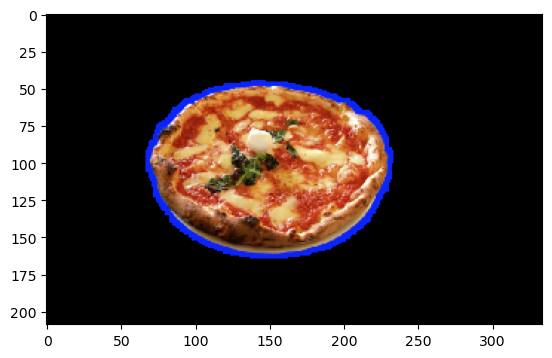

In [89]:
img_with_mask = img.copy()
img_with_mask [mask_clean != 0] = [0,0,0] #recheck this
showrgb(img_with_mask)

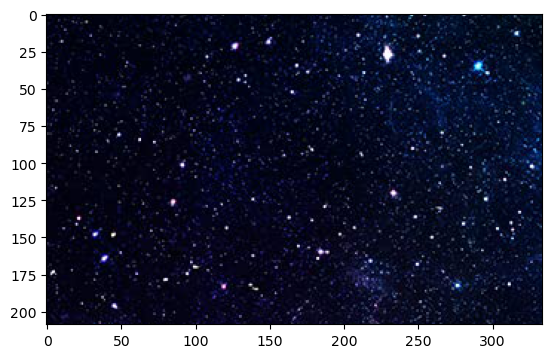

In [48]:
#1 crop the image

bg_crop = bg[0:height , 0:width].copy()
showrgb(bg_crop)

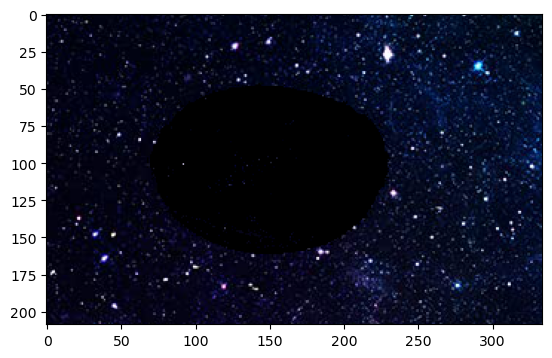

In [49]:
#2apply the mask
bg_crop[mask== 0] = [0,0,0]
showrgb(bg_crop)

In [51]:
final_img = bg_crop + img_with_mask

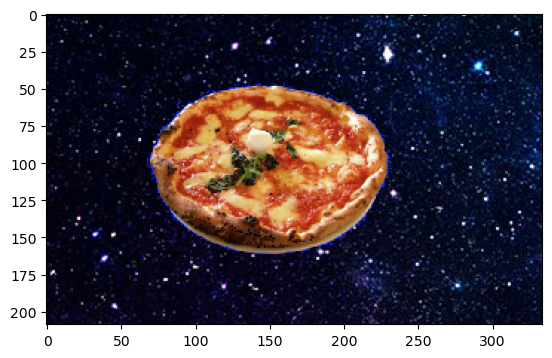

In [52]:
showrgb(final_img)

In [ ]:
bg[0:height , 0:width] = final_img
showrgb(bg)